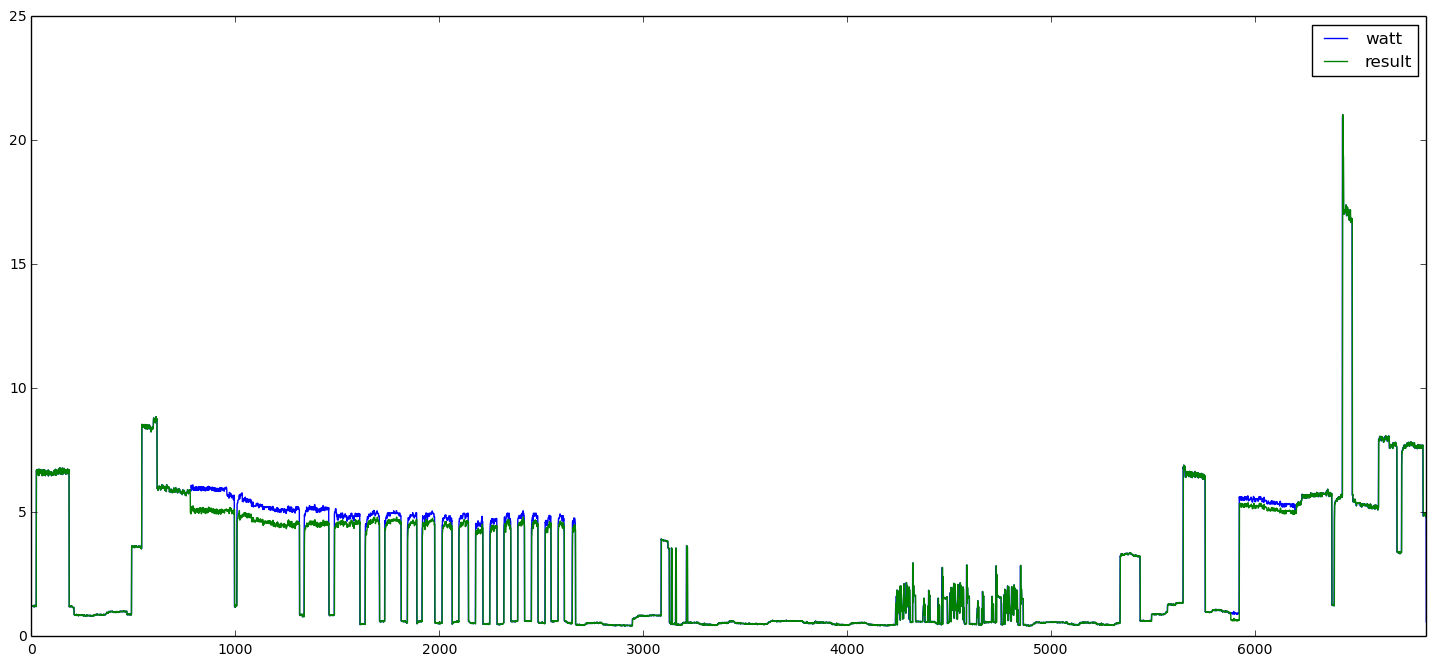

In [19]:
#### import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline 

conn = MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()
d = 9
time_a = pd.date_range('2016-10-01 00:00:00', periods=5760*d, freq='15S')
time_b = pd.date_range('2016-10-01 00:00:14', periods=5760*d, freq='15S')


query = "SELECT Timestamp,watt FROM data_timeline.load_MONTH_1 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "%(time_a[45000],time_b[(5760*d)-1])
df = pd.read_sql(query, conn)
df.watt = df.watt/240

query1 = "SELECT wattnow15sec FROM active.discount15active5 WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "%(time_a[45000],time_b[(5760*d)-1])
df1 = pd.read_sql(query1, conn)
# df1 = df1.reset_index(drop=True)
df['result']=df1.wattnow15sec

fig, ax = plt.subplots(nrows=1,figsize=(9*2, 4*2))
df.plot(ax=ax)
plt.show()


In [15]:
print df.watt.sum()
print df.result.sum()
print df.watt.sum()-df.result.sum()

39674.8458333
38930.782693
744.063140333
